# Report

## Dataset
two moon dataset with noise 0.1, 0.3, 0.5, 0.7, 0.9
- x : 2 x ?  
- y : 1 x ?

[click](#Input-Data) if you are interested in how the data looks like

### Logistic Regression Classifier

The inference of Logistic regression can be expressed with   
$$\hat y = a = \sigma(w^Tx + b)$$  

The following is the shape of core matrices used in this method:
```python
matrix shape (row x column)
    x : 2 x ?
    w : 2 x 1
    b : 1 x 1
    wTx : 1 x ?
    y : 1 x ?
```
where the ? stands for the number of data, which is also written as m.

We put in all the m inputs, and calculate the gradients regarding parameters w and b.
```python
m = y.shape[1]

dz = y_hat - y # dz : 1 x ?
dw = (1 / m) * (x @ dz.T) # x : 2 x ?, dw : 2 x 1
db = (1 / m) * np.sum(dz) # b : 1 x 1
```
these calculations are the result of the gradient of the loss function, $J = \frac{1}{m} \sum ylog(\hat y) + (1-y)log(1 - \hat y)$

Then we update the parameters with the gradients.
```python
self.w -= lr * dw
self.b -= lr * db
```
where lr is learning rate, which is a hyperparamter and set to 0.1.

I checked the loss of validation set when training, and starting from iteration 10000, if 10 consecutive increase of validation loss happens, then I stop training to prevent overfitting.

The hyperparameters are the parameters that human need to set, which are
- learning rate : 0.1
- number of iteration : 100000
- choice of activation function : sigmoid
- choice of training extent (with regard to validation set)
  - checking contiguous increase of validation loss
  - stop training if 10 contiguous increase happens starting from iteration 10000

The learning curve of training and validation can be found [below](#Logistic-Regression).

The test set accuracy is as follows:

| Logistic Regression | 0.1  | 0.3  | 0.5  | 0.7   | 0.9   |
|---------------------|------|------|------|-------|-------|
| accuracy            | 0.84 | 0.85 | 0.85 | 0.755 | 0.785 |

You can see that accuracy generally decreases as noise gets bigger, which is quite natural, because noise represents inconsistent, unseperable, faulty data.



## One Hidden Layer NN

The inference of One Hidden Layer NN can be expressed with   
$$
a1 = \sigma(w1^Tx + b1) \\
\hat y = a2 = \sigma(w2^Ta1 + b2)
$$  

The following is the shape of core matrices used in this method:
```python
matrix shape (row x column)
    x : 2 x ?
                
    w1 : [1,3,5,7,9] x 2
    b1 : [1,3,5,7,9] x 1
    a1 : [1,3,5,7,9] x ?

    w2 : 1 x [1,3,5,7,9]
    b2 : 1 x 1
    a2(y_hat) : 1 x ?
```
where the ? stands for the number of data, which is also written as m.

We put in all the m inputs, and calculate the gradients regarding parameters w and b.
```python
z1 = self.w1 @ x + self.b1 # z1 : [1,3,5,7,9] x ?
a1 = self.sigmoid(z1) # a1 : [1,3,5,7,9] x ?
z2 = self.w2 @ a1 + self.b2 # z2 : 1 x ?
a2 = self.sigmoid(z2) # a2 : 1 x ?

m = y.shape[1]

dz2 = a2 - y # dz2 : 1 x ?
dw2 = (1 / m) * (dz2 @ a1.T) # dw2 : 1 x [1,3,5,7,9]
db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True) # db2 : 1 x ? -> 1 x 1
dz1 = (self.w2.T @ dz2) * (self.sigmoid_derivative(z1)) # dz1 : [1,3,5,7,9] x ? # element wise matrix multiplication
dw1 = (1 / m) * (dz1 @ x.T) # [1,3,5,7,9] x 2
db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True) # db1 : [1,3,5,7,9] x ? -> [1,3,5,7,9] x 1
```
these calculations are the result of the gradient of the loss function, $J = \frac{1}{m} \sum ylog(\hat y) + (1-y)log(1 - \hat y)$

Then we update the parameters with the gradients.
```python
self.w2 -= lr * dw2
self.b2 -= lr * db2
self.w1 -= lr * dw1
self.b1 -= lr * db1
```
where lr is learning rate, which is a hyperparamter and set to 0.1.

I checked the loss of validation set when training, and starting from iteration 10000, if 10 consecutive increase of validation loss happens, then I stop training to prevent overfitting.

The hyperparameters are the parameters that human need to set, which are
- learning rate : 0.1
- number of iteration : 100000
- choice of activation function : sigmoid
- choice of training extent (with regard to validation set)
  - checking contiguous increase of validation loss
  - stop training if 10 contiguous increase happens starting from iteration 10000
- number of hidden layers : 1
- number of hidden units : 1,3,5,7,9

The learning curve of training and validation can be found [below](#One-Layer-NN).

The test set accuracy is as follows:

| One Hidden Layer | 0.1   | 0.3   | 0.5   | 0.7   | 0.9   |
|------------------|-------|-------|-------|-------|-------|
| 1                | 0.84  | 0.84  | 0.855 | 0.76  | 0.78  |
| 3                | 0.84  | 0.895 | 0.86  | 0.765 | 0.775 |
| 5                | 0.84  | 0.89  | 0.86  | 0.76  | 0.775 |
| 7                | 0.91  | 0.84  | 0.855 | 0.765 | 0.78  |
| 9                | 0.855 | 0.9   | 0.865 | 0.77  | 0.78  |
| Optimal          | 7     | 9     | 9     | 9     | 1     |

I chose the optimal layer with the standard of
- having the highest accuracy in that dataset
- if accuracy score is the same, choose the one that has less hidden units (simpler)

You can see that accuracy generally decreases as noise gets bigger.  

You can also see that accuracy generally increases as number of hidden units increase.

## Two Hidden Layer NN

The inference of Two Hidden Layer NN can be expressed with   
$$
a1 = \sigma(w1^Tx + b1) \\
a2 = \sigma(w2^Ta1 + b2) \\
\hat y = a3 = \sigma(w3^Ta2 + b3)
$$  

The following is the shape of core matrices used in this method:
```python
matrix shape (row x column)
    x : 2 x ?

    w1 : hidden1 x 2
    b1 : hidden1 x 1
    a1 : hidden1 x ?

    w2 : hidden2 x hidden1
    b2 : hidden2 x 1
    a2 : hidden2 x ?

    w3 : 1 x hidden2
    b3 : 1 x 1
    a3(y_hat) : 1 x ?
```
where the ? stands for the number of data, which is also written as m.

We put in all the m inputs, and calculate the gradients regarding parameters w and b.
```python
z1 = self.w1 @ x + self.b1 # z1 : hidden1 x ?
a1 = self.sigmoid(z1) # a1 : hidden1 x ?
z2 = self.w2 @ a1 + self.b2 # z2 : hidden2 x ?
a2 = self.sigmoid(z2) # a2 : hidden2 x ?
z3 = self.w3 @ a2 + self.b3 # z3 : 1 x ?
a3 = self.sigmoid(z3) # a3 : 1 x ?

m = y.shape[1]

dz3 = a3 - y
dw3 = (1 / m) * (dz3 @ a2.T)
db3 = (1 / m) * np.sum(dz3, axis=1, keepdims=True)

dz2 = (self.w3.T @ dz3) * (self.sigmoid_derivative(z2))
dw2 = (1 / m) * (dz2 @ a1.T)
db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

dz1 = (self.w2.T @ dz2) * (self.sigmoid_derivative(z1))
dw1 = (1 / m) * (dz1 @ x.T)
db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
```
these calculations are the result of the gradient of the loss function, $J = \frac{1}{m} \sum ylog(\hat y) + (1-y)log(1 - \hat y)$

Then we update the parameters with the gradients.
```python
self.w3 -= lr * dw3
self.b3 -= lr * db3
self.w2 -= lr * dw2
self.b2 -= lr * db2
self.w1 -= lr * dw1
self.b1 -= lr * db1
```
where lr is learning rate, which is a hyperparamter and set to 0.1.

I checked the loss of validation set when training, and starting from iteration 10000, if 10 consecutive increase of validation loss happens, then I stop training to prevent overfitting.

The hyperparameters are the parameters that human need to set, which are
- learning rate : 0.1
- number of iteration : 100000
- choice of activation function : sigmoid
- choice of training extent (with regard to validation set)
  - checking contiguous increase of validation loss
  - stop training if 10 contiguous increase happens starting from iteration 10000
- number of hidden layers : 2
- number of hidden units : [3,5,7] x [3,5,7]

The learning curve of training and validation can be found [below](#Two-Layer-NN).

The test set accuracy is as follows:

| Two Hidden Layer | 0.1 | 0.3   | 0.5   | 0.7   | 0.9   |
|------------------|-----|-------|-------|-------|-------|
| 3x3              | 1.0 | 0.89  | 0.87  | 0.755 | 0.775 |
| 3x5              | 1.0 | 0.895 | 0.86  | 0.755 | 0.785 |
| 3x7              | 1.0 | 0.84  | 0.86  | 0.765 | 0.775 |
| 5x3              | 1.0 | 0.9   | 0.86  | 0.77  | 0.78  |
| 5x5              | 1.0 | 0.895 | 0.86  | 0.765 | 0.78  |
| 5x7              | 1.0 | 0.84  | 0.855 | 0.76  | 0.775 |
| 7x3              | 1.0 | 0.9   | 0.86  | 0.765 | 0.775 |
| 7x5              | 1.0 | 0.885 | 0.86  | 0.755 | 0.775 |
| 7x7              | 1.0 | 0.895 | 0.86  | 0.755 | 0.775 |
| Optimal          | 3x3 | 5x3   | 3x3   | 5x3   | 3x5   |

I chose the optimal layer with the standard of
- having the highest accuracy in that dataset
- if accuracy score is the same, choose the one that has less hidden units (simpler)

You can see that accuracy generally decreases as noise gets bigger.  

You could also see that the number of hidden units doesn't affect accuracy so much in general, as if it's saying 3x3 is enough.  
The optimal network is around 3x3~5x5.

## Overall

I stopped training when the cost of validation set starts to increase while training, to prevent overfitting.  
Although my validation method made certain improvements in training, it's still hard to find the perfect method that will detect optimal cost in every situation.  
If you see the learning curve below, there are some models that I didn't prevent overfitting fast enough, so the validation cost ended up a little higher than optimal cost.

There are times when validation cost is higher, but test accuracy is also higher.  
This could happen because we use a different validation set and test set, and the model never knows about the test set when training.  

My gradient calculation is all based on the course pdf.  
The accuracy calculation is based on how many inferences the model got it correct in the test set, which the model hasn't seen in training.

When there is noise, the data becomes more unseparable and inconsistent, which could mean complex models won't have much advantage. You can see that in noise 0.9 one hidden layer, 1 hidden unit had the same performance with 7 or 9 hidden units, thus becoming the optimal.  

In two hidden layers, the accuracy is similar with every number of hidden layers, which could mean the complexity of 3x3 is enough to express the classification of two-moon dataset.  

I learned how to use numpy, matplotlib, jupyter, and that deep learning takes a lot of time.  
I think the optimal network is decided by how the data looks like, and I think the two moon dataset can be classified in only 3x3 hidden units, so more than that only makes training harder and could cause overfitting. Though it the complexity of only one hidden layer isn't enough to classify the dataset.    

Source code and Full output can be seen below.

# Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # just for plotting
import numpy as np

# Input Data

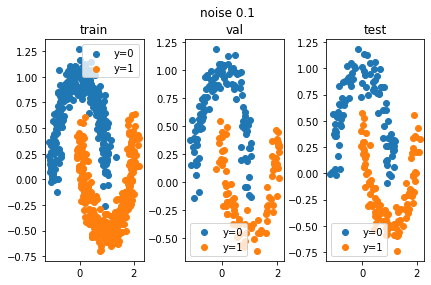

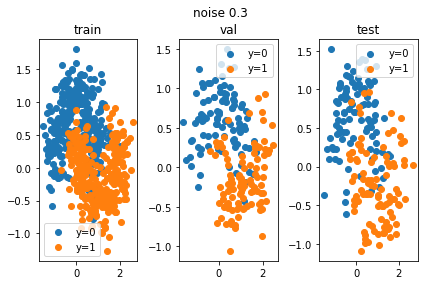

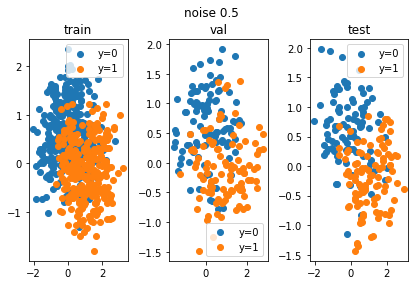

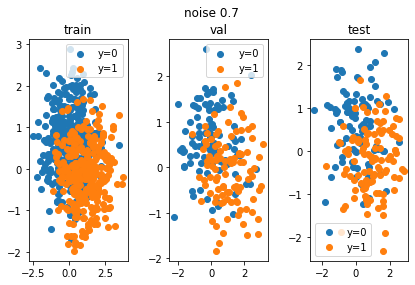

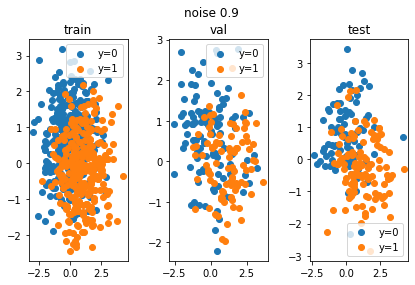

In [2]:
# input data

noises = [0.1, 0.3, 0.5, 0.7, 0.9]
data = [{"train" : None, "val": None, "test": None} for _ in range(len(noises))]

for i in range(len(noises)):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle("noise {}".format(noises[i]))
    fig.tight_layout()

    
    train_x = []
    train_y = []
    train_file = open("two_moon_{}/train.txt".format(noises[i]), "r")
    for line in train_file.readlines():
        l = line.rstrip().split()
        train_x.append([float(l[0]), float(l[1])])
        train_y.append([int(l[2])])
    train_file.close()
    data[i]["train"] = (np.array(train_x).T, np.array(train_y).T)
    
    x = data[i]["train"][0]
    y = data[i]["train"][1]
    zeros = x[:, np.where(y[0] == 0)]
    ones = x[:, np.where(y[0] == 1)]
    ax1.set_title('train')
    ax1.scatter(zeros[0, :], zeros[1, :], label='y=0')
    ax1.scatter(ones[0, :], ones[1, :], label='y=1')
    ax1.legend()


    val_x = []
    val_y = []
    val_file = open("two_moon_{}/val.txt".format(noises[i]), "r")
    for line in val_file.readlines():
        l = line.rstrip().split()
        val_x.append([float(l[0]), float(l[1])])
        val_y.append([int(l[2])])
    val_file.close()
    data[i]["val"] = (np.array(val_x).T, np.array(val_y).T)
    
    x = data[i]["val"][0]
    y = data[i]["val"][1]
    zeros = x[:, np.where(y[0] == 0)]
    ones = x[:, np.where(y[0] == 1)]
    ax2.set_title('val')
    ax2.scatter(zeros[0, :], zeros[1, :], label='y=0')
    ax2.scatter(ones[0, :], ones[1, :], label='y=1')
    ax2.legend()
    

    test_x = []
    test_y = []
    test_file = open("two_moon_{}/test.txt".format(noises[i]), "r")
    for line in test_file.readlines():
        l = line.rstrip().split()
        test_x.append([float(l[0]), float(l[1])])
        test_y.append([int(l[2])])
    test_file.close()
    data[i]["test"] = (np.array(test_x).T, np.array(test_y).T)
    
    x = data[i]["test"][0]
    y = data[i]["test"][1]
    zeros = x[:, np.where(y[0] == 0)]
    ones = x[:, np.where(y[0] == 1)]
    ax3.set_title('test')
    ax3.scatter(zeros[0, :], zeros[1, :], label='y=0')
    ax3.scatter(ones[0, :], ones[1, :], label='y=1')
    ax3.legend()
    
    plt.show()

# Logistic Regression

In [3]:
class LogisticRegression:
    def __init__(self):
        '''
            matrix shape (row x column)
                x : 2 x ?
                w : 2 x 1
                b : 1 x 1
                wTx : 1 x ?
                y : 1 x ?
        '''
        self.w = np.random.rand(2,1) # weight initialization
        self.b = 0 # bias initialization
        
    def sigmoid(self, z):
        '''
            Activation function sigmoid
            input :
                z : 1 x ?
            output :
                prediction(y_hat) : 1 x ?
        '''
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        '''
            derivative function of sigmoid
            sig(z) * (1 - sig(z))
        '''
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def predict(self, x, classify=False):
        '''
            Predict label
            input : 
                data(x) : 2 x ?
            output : 
                prediction(y_hat) : 1 x ?
        '''
        z = self.w.T @ x + self.b # z : 1 x ?
        a = self.sigmoid(z) # a : 1 x ?
        
        if classify == True:
            classifier = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
            return classifier(a)
        else:
            return a


    def cost(self, y_hat, y):
        '''
            Cost function of logistic regression
            input : 
                prediction(y_hat) : 1 x ?
                label(y) : 1 x ?
            output : 
                cost function value : 1 x 1
        '''
        assert len(y_hat) == len(y)

        m = y.shape[1]

        epsilon = 0.000000001 # prevent -inf in log operation

        cost = (-1 / m) * np.sum(y * np.log(y_hat + epsilon) + (1-y) * np.log(1 - y_hat + epsilon))

        return cost

    def gradient_descent(self, x, y, lr):
        '''
            update weights according to back propagation and gradient descent
        '''
        y_hat = self.predict(x)
        
        m = y.shape[1]
        
        dz = y_hat - y # dz : 1 x ?
        dw = (1 / m) * (x @ dz.T) # x : 2 x ?, dw : 2 x 1
        db = (1 / m) * np.sum(dz) # b : 1 x 1
        
        self.w -= lr * dw
        self.b -= lr * db

    def train(self, train_x, train_y, val_x, val_y, lr, iters):
        '''
            start training
                output : train, validation cost history
        '''
        cost_increase = 0
        train_cost_history = []
        val_cost_history = []
        prev_cost = self.cost(self.predict(val_x, classify=False), val_y)
        val_cost_history.append(prev_cost)
        train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
        
        for i in range(iters):
            self.gradient_descent(train_x, train_y, lr) # update w,b
            
            current_cost = self.cost(self.predict(val_x, classify=False), val_y)
            val_cost_history.append(current_cost)
            train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
            
            if prev_cost < current_cost: 
                cost_increase += 1
            else:
                cost_increse = 0
            
            # stop training to prevent overfitting
            if i > (iters//10) and cost_increase > 10:
                break
            
            prev_cost = current_cost
            
        print("Iteration:", i ,"Cost:", current_cost)
        return train_cost_history, val_cost_history
                
    def accuracy(self, test_x, test_y):
        '''
            calculate accuracy (correct prediction / total num of data)
        '''
        y_hat = self.predict(test_x, classify=True)
        return (np.sum(y_hat == test_y) / test_y.shape[1])

Noise :  0.1
####################################################################################################
Logistic Regression
Iteration: 10001 Cost: 0.2758593891028553


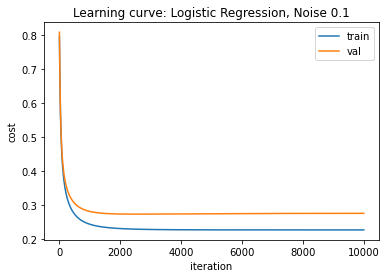

Accuracy: 0.84

####################################################################################################
Noise :  0.3
####################################################################################################
Logistic Regression
Iteration: 20560 Cost: 0.32265309163020744


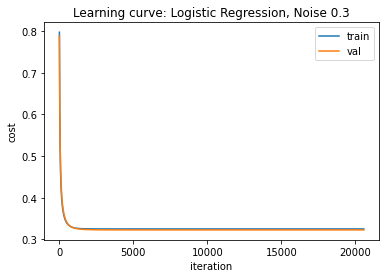

Accuracy: 0.85

####################################################################################################
Noise :  0.5
####################################################################################################
Logistic Regression
Iteration: 10001 Cost: 0.4537465723379408


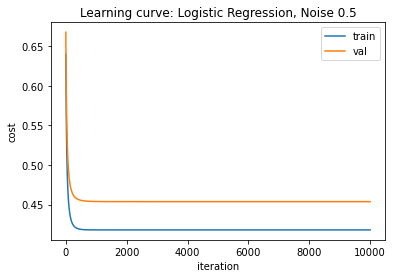

Accuracy: 0.85

####################################################################################################
Noise :  0.7
####################################################################################################
Logistic Regression
Iteration: 10001 Cost: 0.5119207373812443


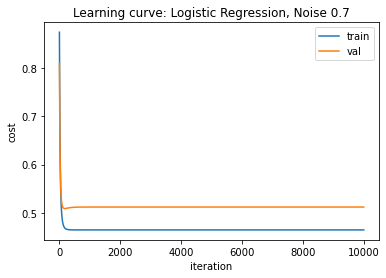

Accuracy: 0.755

####################################################################################################
Noise :  0.9
####################################################################################################
Logistic Regression
Iteration: 10001 Cost: 0.5687201117190496


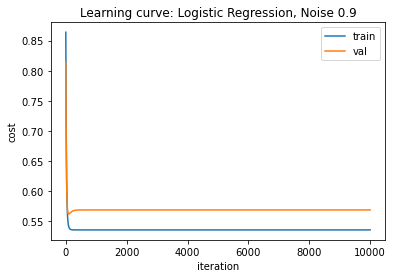

Accuracy: 0.785

####################################################################################################


In [4]:
for i in range(len(noises)):
    train_x, train_y = data[i]["train"]
    val_x, val_y = data[i]["val"]
    test_x, test_y = data[i]["test"]
    
    print("Noise : ", noises[i])
    print("#"*100)
    
    print("Logistic Regression")
    prob_1 = LogisticRegression()
    train_cost_history, val_cost_history = prob_1.train(train_x, train_y, val_x, val_y, lr=0.1, iters=100000)
    
    plt.title("Learning curve: Logistic Regression, Noise {}".format(noises[i]))
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.plot(train_cost_history, label='train')
    plt.plot(val_cost_history, label='val')
    plt.legend()
    plt.show()
    print("Accuracy:", prob_1.accuracy(test_x, test_y))
    print("")
    print("#"*100)

# One Layer NN

In [5]:
class OneHiddenLayer(LogisticRegression):
    def __init__(self, hidden):
        '''
            matrix shape (row x column)
                x : 2 x ?
                
                w1 : [1,3,5,7,9] x 2
                b1 : [1,3,5,7,9] x 1
                a1 : [1,3,5,7,9] x ?
                
                w2 : 1 x [1,3,5,7,9]
                b2 : 1 x 1
                a2(y_hat) : 1 x ?
        '''
        # layer 1 (hidden layer)
        self.w1 = np.random.rand(hidden, 2) # weight initialization
        self.b1 = np.zeros((hidden, 1)) # bias initialization
        # final layer (goes to y)
        self.w2 = np.random.rand(1, hidden)
        self.b2 = 0

    def predict(self, x, classify=False):
        '''
            Predict label
            input : 
                data(x) : 2 x ?
            output : 
                prediction(y_hat) : 1 x ?
        '''
        
        z1 = self.w1 @ x + self.b1 # z1 : [1,3,5,7,9] x ?
        a1 = self.sigmoid(z1) # a1 : [1,3,5,7,9] x ?
        z2 = self.w2 @ a1 + self.b2 # z2 : 1 x ?
        a2 = self.sigmoid(z2) # a2 : 1 x ?
        
        if classify == True:
            classifier = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
            return classifier(a2)
        else:
            return a2


    def gradient_descent(self, x, y, lr):
        '''
            update weights according to back propagation and gradient descent
        '''
        z1 = self.w1 @ x + self.b1 # z1 : [1,3,5,7,9] x ?
        a1 = self.sigmoid(z1) # a1 : [1,3,5,7,9] x ?
        z2 = self.w2 @ a1 + self.b2 # z2 : 1 x ?
        a2 = self.sigmoid(z2) # a2 : 1 x ?
        
        m = y.shape[1]
        
        dz2 = a2 - y # dz2 : 1 x ?
        dw2 = (1 / m) * (dz2 @ a1.T) # dw2 : 1 x [1,3,5,7,9]
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True) # db2 : 1 x ? -> 1 x 1
        dz1 = (self.w2.T @ dz2) * (self.sigmoid_derivative(z1)) # dz1 : [1,3,5,7,9] x ? # element wise matrix multiplication
        dw1 = (1 / m) * (dz1 @ x.T) # [1,3,5,7,9] x 2
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True) # db1 : [1,3,5,7,9] x ? -> [1,3,5,7,9] x 1
        
        self.w2 -= lr * dw2
        self.b2 -= lr * db2
        self.w1 -= lr * dw1
        self.b1 -= lr * db1
        
        

    def train(self, train_x, train_y, val_x, val_y, lr, iters):
        '''
            start training
                output : train, validation cost history
        '''
        cost_increase = 0
        train_cost_history = []
        val_cost_history = []
        prev_cost = self.cost(self.predict(val_x, classify=False), val_y)
        val_cost_history.append(prev_cost)
        train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
        
        for i in range(iters):
            self.gradient_descent(train_x, train_y, lr) # update w,b
            
            current_cost = self.cost(self.predict(val_x, classify=False), val_y)
            val_cost_history.append(current_cost)
            train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
            
            if prev_cost < current_cost: 
                cost_increase += 1
            else:
                cost_increse = 0
            
            # stop training to prevent overfitting
            if i > (iters//10) and cost_increase > 10:
                break
            
            prev_cost = current_cost
            
        print("Iteration:", i ,"Cost:", current_cost)
        return train_cost_history, val_cost_history

Noise :  0.1
####################################################################################################
One Hidden Layer : 1
Iteration: 99999 Cost: 0.2785196064435195


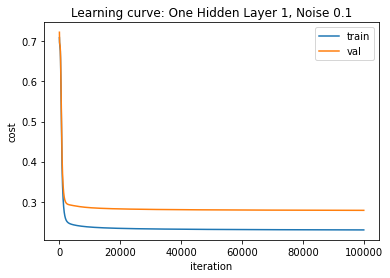

Accuracy: 0.84

One Hidden Layer : 3
Iteration: 10001 Cost: 0.28047820979157406


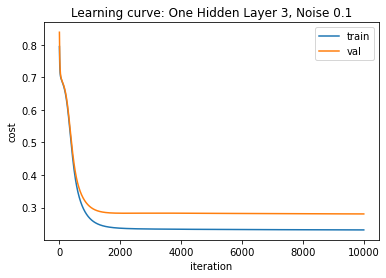

Accuracy: 0.84

One Hidden Layer : 5
Iteration: 10001 Cost: 0.27954789820644493


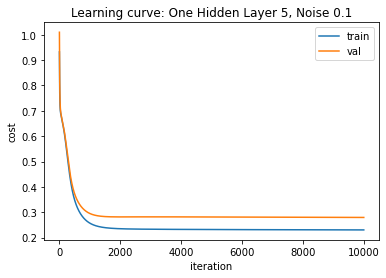

Accuracy: 0.84

One Hidden Layer : 7
Iteration: 10001 Cost: 0.1834186897122273


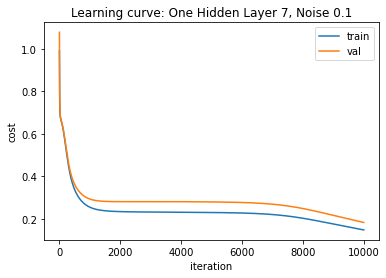

Accuracy: 0.91

One Hidden Layer : 9
Iteration: 10001 Cost: 0.25640536865550195


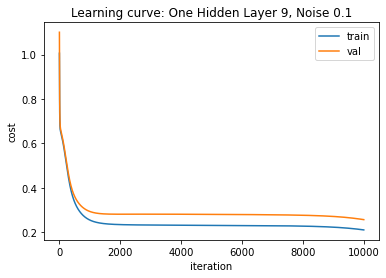

Accuracy: 0.855

####################################################################################################
Noise :  0.3
####################################################################################################
One Hidden Layer : 1
Iteration: 99999 Cost: 0.3236884212008004


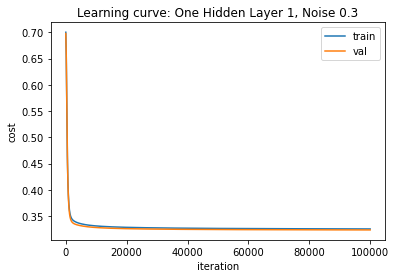

Accuracy: 0.84

One Hidden Layer : 3
Iteration: 39109 Cost: 0.2549359105237631


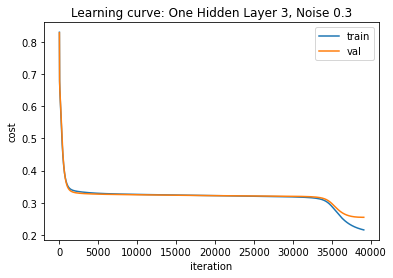

Accuracy: 0.895

One Hidden Layer : 5
Iteration: 35034 Cost: 0.2555949838934432


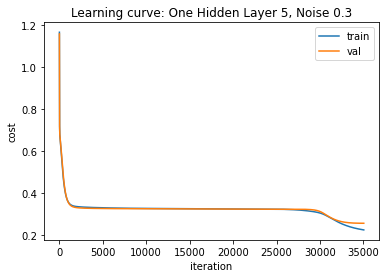

Accuracy: 0.89

One Hidden Layer : 7
Iteration: 15566 Cost: 0.3239161055239792


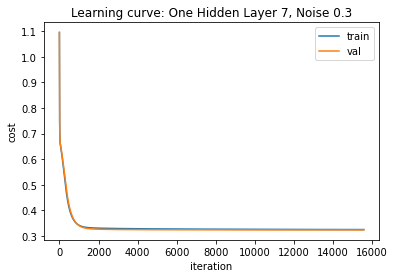

Accuracy: 0.84

One Hidden Layer : 9
Iteration: 21506 Cost: 0.25280458820526686


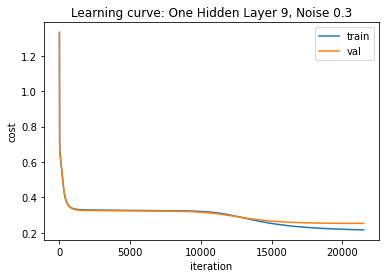

Accuracy: 0.9

####################################################################################################
Noise :  0.5
####################################################################################################
One Hidden Layer : 1
Iteration: 99999 Cost: 0.45859975534137065


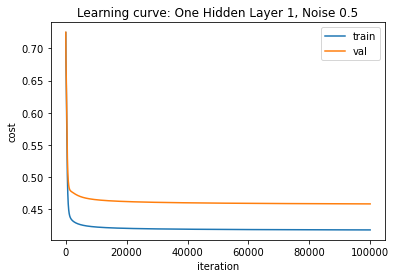

Accuracy: 0.855

One Hidden Layer : 3
Iteration: 15623 Cost: 0.45942319964766126


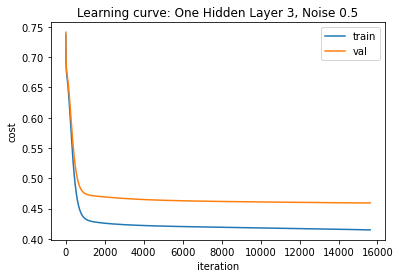

Accuracy: 0.86

One Hidden Layer : 5
Iteration: 10001 Cost: 0.46015128315272735


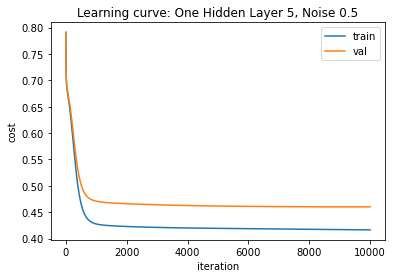

Accuracy: 0.86

One Hidden Layer : 7
Iteration: 10001 Cost: 0.45930231908275465


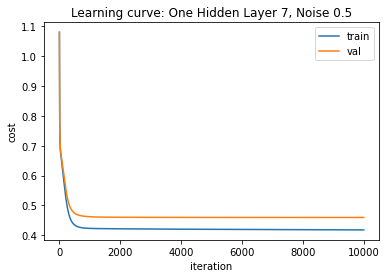

Accuracy: 0.855

One Hidden Layer : 9
Iteration: 10263 Cost: 0.4587601209481922


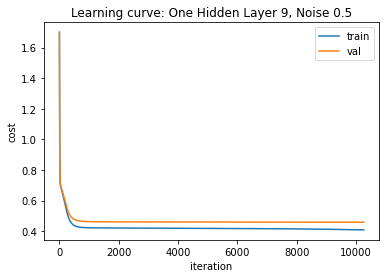

Accuracy: 0.865

####################################################################################################
Noise :  0.7
####################################################################################################
One Hidden Layer : 1
Iteration: 99999 Cost: 0.5096874024135706


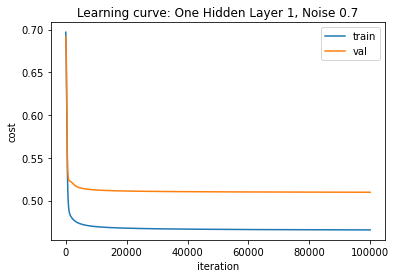

Accuracy: 0.76

One Hidden Layer : 3
Iteration: 10001 Cost: 0.5103379061711509


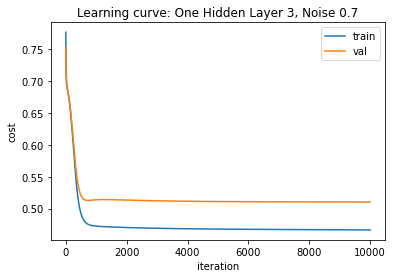

Accuracy: 0.765

One Hidden Layer : 5
Iteration: 10001 Cost: 0.5089229820568325


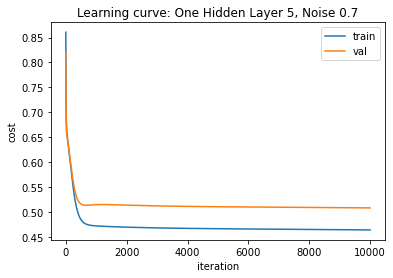

Accuracy: 0.76

One Hidden Layer : 7
Iteration: 10001 Cost: 0.5104691030421304


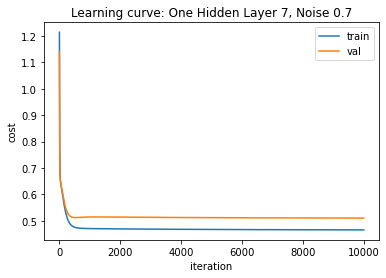

Accuracy: 0.765

One Hidden Layer : 9
Iteration: 10001 Cost: 0.5090762182693426


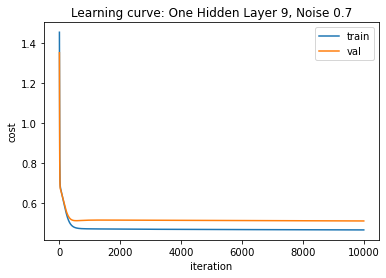

Accuracy: 0.77

####################################################################################################
Noise :  0.9
####################################################################################################
One Hidden Layer : 1
Iteration: 99999 Cost: 0.5617538957137103


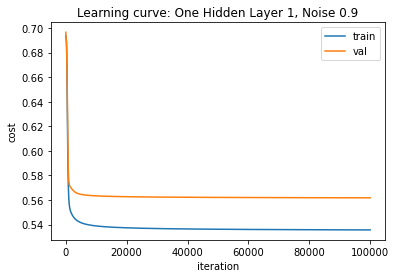

Accuracy: 0.78

One Hidden Layer : 3
Iteration: 10001 Cost: 0.5610885679217232


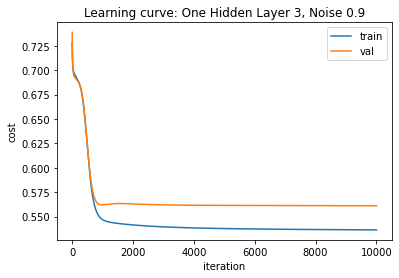

Accuracy: 0.775

One Hidden Layer : 5
Iteration: 10001 Cost: 0.5618778403349347


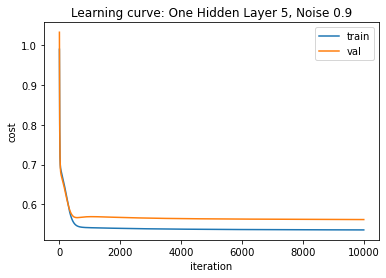

Accuracy: 0.775

One Hidden Layer : 7
Iteration: 10001 Cost: 0.5630952030443904


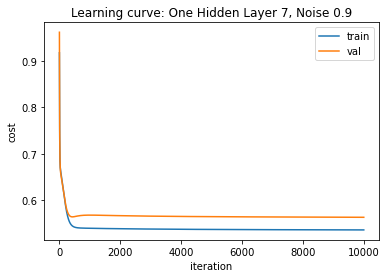

Accuracy: 0.78

One Hidden Layer : 9
Iteration: 10001 Cost: 0.5626100266038813


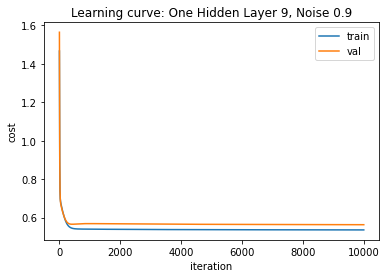

Accuracy: 0.78

####################################################################################################


In [6]:
for i in range(len(noises)):
    train_x, train_y = data[i]["train"]
    val_x, val_y = data[i]["val"]
    test_x, test_y = data[i]["test"]
    
    print("Noise : ", noises[i])
    print("#"*100)
    
    for n in range(1,10,2):    
        print("One Hidden Layer : {}".format(n))
        prob_2 = OneHiddenLayer(hidden=n)
        train_cost_history, val_cost_history = prob_2.train(train_x, train_y, val_x, val_y, lr=0.1, iters=100000)
        
        plt.title("Learning curve: One Hidden Layer {}, Noise {}".format(n, noises[i]))
        plt.xlabel("iteration")
        plt.ylabel("cost")
        plt.plot(train_cost_history, label='train')
        plt.plot(val_cost_history, label='val')
        plt.legend()
        plt.show()
        print("Accuracy:", prob_2.accuracy(test_x, test_y))
        print("")
    print("#"*100)

# Two Layer NN

In [7]:
class TwoHiddenLayer(LogisticRegression):
    def __init__(self, hidden1, hidden2):
        '''
            matrix shape (row x column)
                x : 2 x ?
                
                w1 : hidden1 x 2
                b1 : hidden1 x 1
                a1 : hidden1 x ?
                
                w2 : hidden2 x hidden1
                b2 : hidden2 x 1
                a2 : hidden2 x ?
                
                w3 : 1 x hidden2
                b3 : 1 x 1
                a3(y_hat) : 1 x ?
        '''
        # layer 1 (hidden1)
        self.w1 = np.random.rand(hidden1, 2) # weight initialization
        self.b1 = np.zeros((hidden1, 1)) # bias initialization
        # layer 2 (hidden2)
        self.w2 = np.random.rand(hidden2, hidden1)
        self.b2 = np.zeros((hidden2, 1))
        # final layer (goes to y)
        self.w3 = np.random.rand(1, hidden2)
        self.b3 = 0

    def predict(self, x, classify=False):
        '''
            Predict label
            input : 
                data(x) : 2 x ?
            output : 
                prediction(y_hat) : 1 x ?
        '''
        
        z1 = self.w1 @ x + self.b1 # z1 : hidden1 x ?
        a1 = self.sigmoid(z1) # a1 : hidden1 x ?
        z2 = self.w2 @ a1 + self.b2 # z2 : hidden2 x ?
        a2 = self.sigmoid(z2) # a2 : hidden2 x ?
        z3 = self.w3 @ a2 + self.b3 # z3 : 1 x ?
        a3 = self.sigmoid(z3) # a3 : 1 x ?
        
        if classify == True:
            classifier = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
            return classifier(a3)
        else:
            return a3


    def gradient_descent(self, x, y, lr):
        '''
            update weights according to back propagation and gradient descent
        '''
        z1 = self.w1 @ x + self.b1 # z1 : hidden1 x ?
        a1 = self.sigmoid(z1) # a1 : hidden1 x ?
        z2 = self.w2 @ a1 + self.b2 # z2 : hidden2 x ?
        a2 = self.sigmoid(z2) # a2 : hidden2 x ?
        z3 = self.w3 @ a2 + self.b3 # z3 : 1 x ?
        a3 = self.sigmoid(z3) # a3 : 1 x ?
        
        m = y.shape[1]
        
        dz3 = a3 - y
        dw3 = (1 / m) * (dz3 @ a2.T)
        db3 = (1 / m) * np.sum(dz3, axis=1, keepdims=True)
        
        dz2 = (self.w3.T @ dz3) * (self.sigmoid_derivative(z2))
        dw2 = (1 / m) * (dz2 @ a1.T)
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
        
        dz1 = (self.w2.T @ dz2) * (self.sigmoid_derivative(z1))
        dw1 = (1 / m) * (dz1 @ x.T)
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
        
        self.w3 -= lr * dw3
        self.b3 -= lr * db3
        self.w2 -= lr * dw2
        self.b2 -= lr * db2
        self.w1 -= lr * dw1
        self.b1 -= lr * db1
        

    def train(self, train_x, train_y, val_x, val_y, lr, iters):
        '''
            start training
                output : train, validation cost history
        '''
        cost_increase = 0
        train_cost_history = []
        val_cost_history = []
        prev_cost = self.cost(self.predict(val_x, classify=False), val_y)
        val_cost_history.append(prev_cost)
        train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
        
        for i in range(iters):
            self.gradient_descent(train_x, train_y, lr) # update w,b
            
            current_cost = self.cost(self.predict(val_x, classify=False), val_y)
            val_cost_history.append(current_cost)
            train_cost_history.append(self.cost(self.predict(train_x, classify=False), train_y))
            
            if prev_cost < current_cost: 
                cost_increase += 1
            else:
                cost_increse = 0
            
            # stop training to prevent overfitting
            if i > (iters//10) and cost_increase > 10:
                break
            
            prev_cost = current_cost
            
        print("Iteration:", i ,"Cost:", current_cost)
        return train_cost_history, val_cost_history

Noise :  0.1
####################################################################################################
Two Hidden Layers : 3 x 3
Iteration: 37824 Cost: 0.006716085332916733


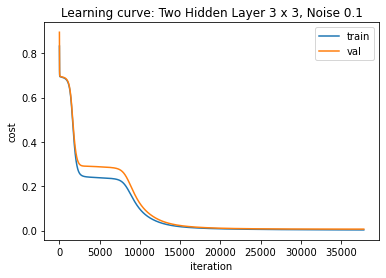

Accuracy: 1.0

Two Hidden Layers : 3 x 5
Iteration: 69544 Cost: 0.0067539892110228105


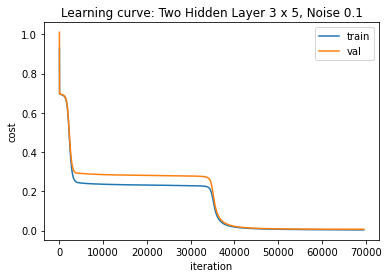

Accuracy: 1.0

Two Hidden Layers : 3 x 7
Iteration: 36782 Cost: 0.0066106140754175645


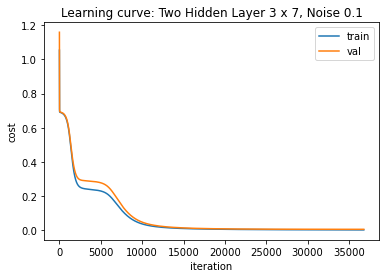

Accuracy: 1.0

Two Hidden Layers : 5 x 3
Iteration: 47717 Cost: 0.007071188714845542


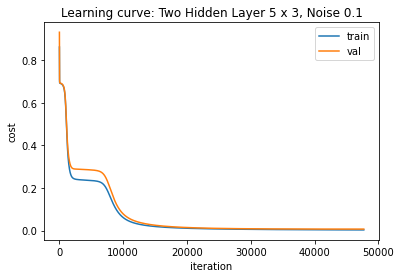

Accuracy: 1.0

Two Hidden Layers : 5 x 5
Iteration: 83400 Cost: 0.0064289547484010215


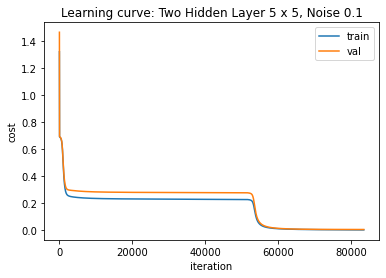

Accuracy: 1.0

Two Hidden Layers : 5 x 7
Iteration: 53473 Cost: 0.0069581697599047365


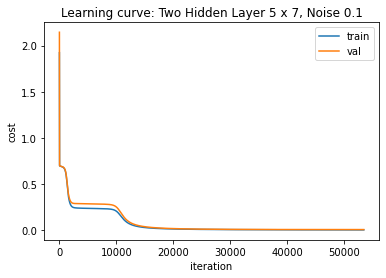

Accuracy: 1.0

Two Hidden Layers : 7 x 3
Iteration: 53676 Cost: 0.007334169022148838


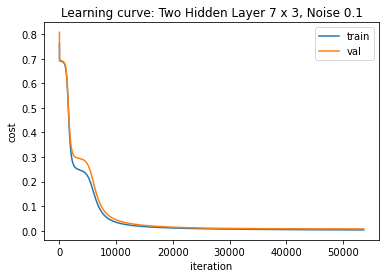

Accuracy: 1.0

Two Hidden Layers : 7 x 5
Iteration: 47123 Cost: 0.007241251078601843


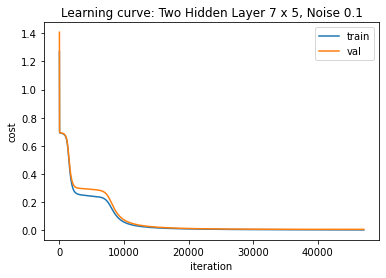

Accuracy: 1.0

Two Hidden Layers : 7 x 7
Iteration: 67912 Cost: 0.007071148529215808


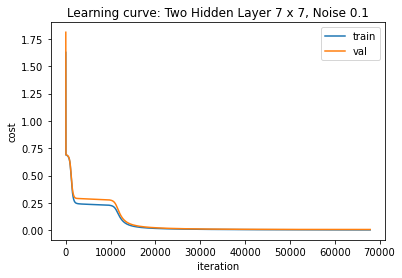

Accuracy: 1.0

####################################################################################################
Noise :  0.3
####################################################################################################
Two Hidden Layers : 3 x 3
Iteration: 46684 Cost: 0.2516483369416832


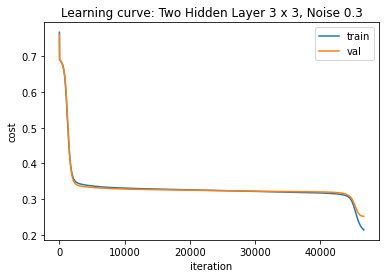

Accuracy: 0.89

Two Hidden Layers : 3 x 5
Iteration: 50191 Cost: 0.24290429632456742


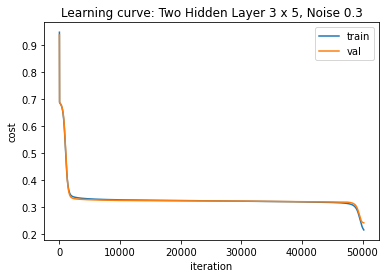

Accuracy: 0.895

Two Hidden Layers : 3 x 7
Iteration: 17167 Cost: 0.3246685775315457


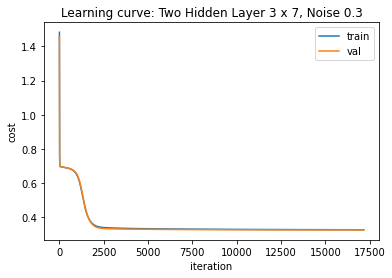

Accuracy: 0.84

Two Hidden Layers : 5 x 3
Iteration: 10001 Cost: 0.25242043560911653


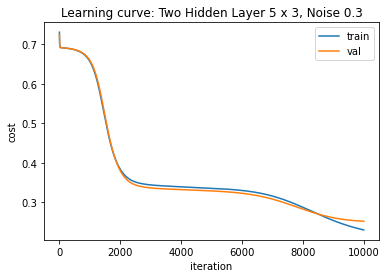

Accuracy: 0.9

Two Hidden Layers : 5 x 5
Iteration: 11250 Cost: 0.25122746283124847


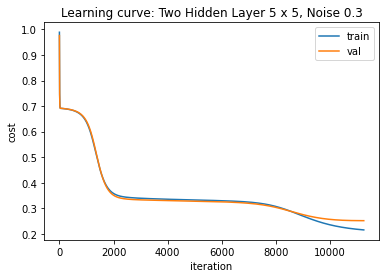

Accuracy: 0.895

Two Hidden Layers : 5 x 7
Iteration: 10001 Cost: 0.32657526003244913


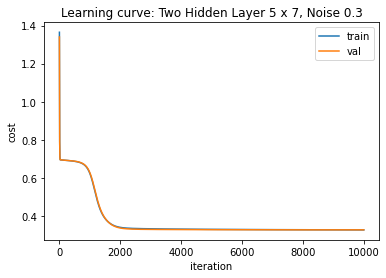

Accuracy: 0.84

Two Hidden Layers : 7 x 3
Iteration: 12903 Cost: 0.24878964139538348


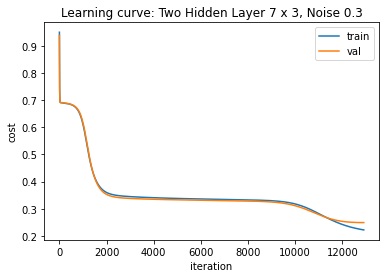

Accuracy: 0.9

Two Hidden Layers : 7 x 5
Iteration: 10001 Cost: 0.27414802757005535


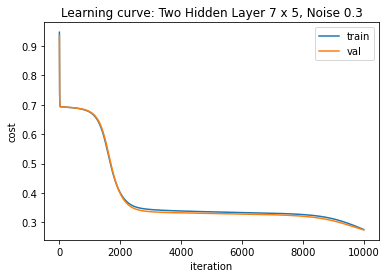

Accuracy: 0.885

Two Hidden Layers : 7 x 7
Iteration: 11643 Cost: 0.2502418156549059


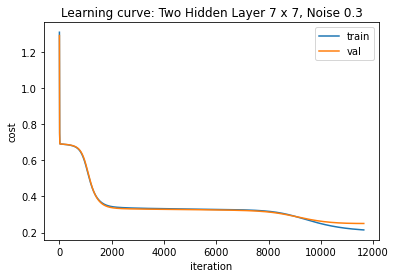

Accuracy: 0.895

####################################################################################################
Noise :  0.5
####################################################################################################
Two Hidden Layers : 3 x 3
Iteration: 11184 Cost: 0.46405767723139013


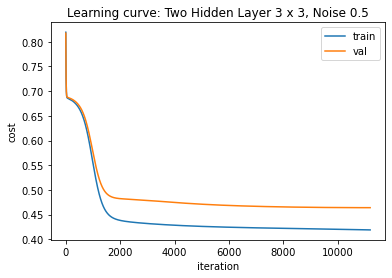

Accuracy: 0.87

Two Hidden Layers : 3 x 5
Iteration: 13456 Cost: 0.46233252955318677


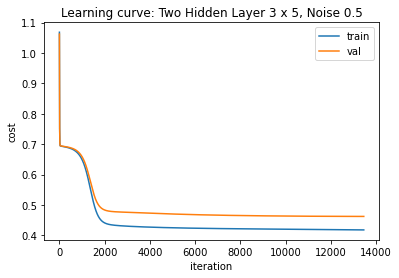

Accuracy: 0.86

Two Hidden Layers : 3 x 7
Iteration: 18199 Cost: 0.46129107240917977


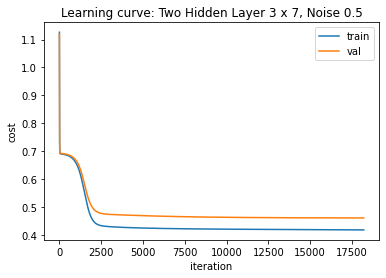

Accuracy: 0.86

Two Hidden Layers : 5 x 3
Iteration: 10001 Cost: 0.4608007758722124


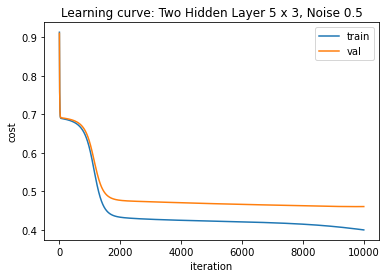

Accuracy: 0.86

Two Hidden Layers : 5 x 5
Iteration: 24295 Cost: 0.4609945204355703


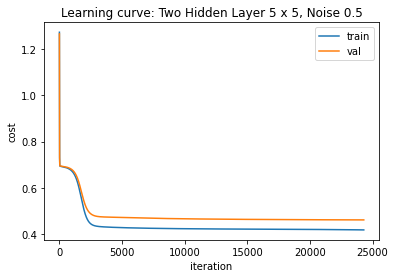

Accuracy: 0.86

Two Hidden Layers : 5 x 7
Iteration: 22371 Cost: 0.45976773615571487


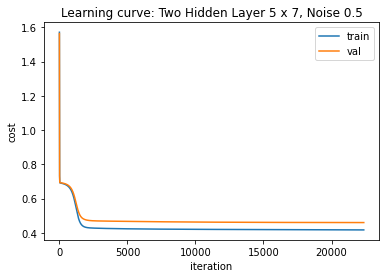

Accuracy: 0.855

Two Hidden Layers : 7 x 3
Iteration: 10001 Cost: 0.4612225304859169


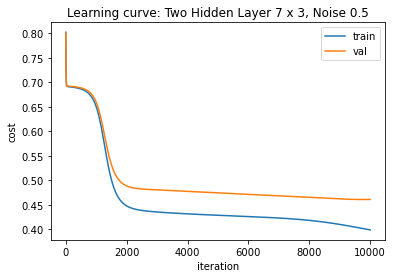

Accuracy: 0.86

Two Hidden Layers : 7 x 5
Iteration: 17374 Cost: 0.46086069267495733


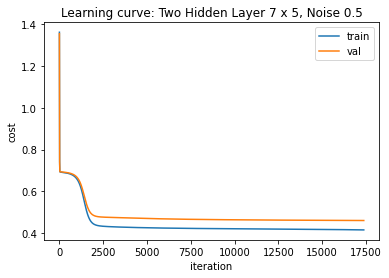

Accuracy: 0.86

Two Hidden Layers : 7 x 7
Iteration: 11105 Cost: 0.4606112375168997


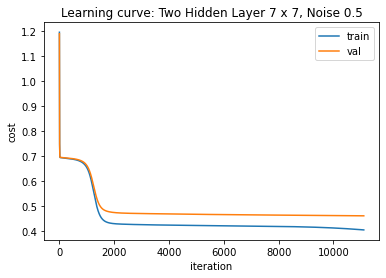

Accuracy: 0.86

####################################################################################################
Noise :  0.7
####################################################################################################
Two Hidden Layers : 3 x 3
Iteration: 10001 Cost: 0.5130115775453248


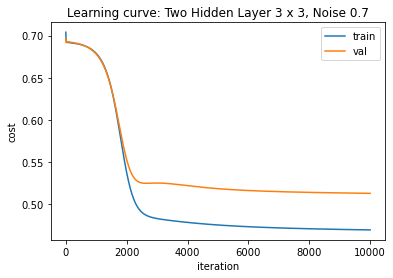

Accuracy: 0.755

Two Hidden Layers : 3 x 5
Iteration: 10001 Cost: 0.5132458869224183


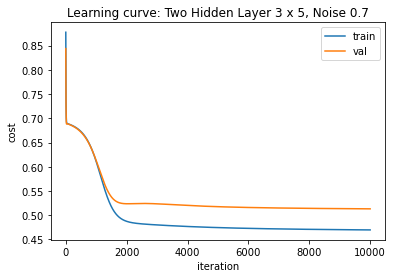

Accuracy: 0.755

Two Hidden Layers : 3 x 7
Iteration: 10001 Cost: 0.5114046683290772


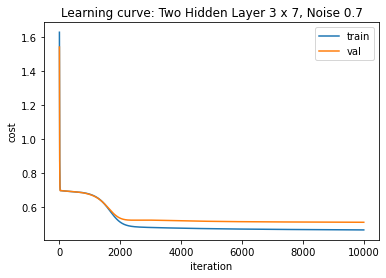

Accuracy: 0.765

Two Hidden Layers : 5 x 3
Iteration: 10001 Cost: 0.511372925632462


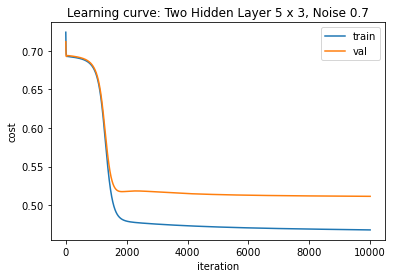

Accuracy: 0.77

Two Hidden Layers : 5 x 5
Iteration: 10001 Cost: 0.5128463696735444


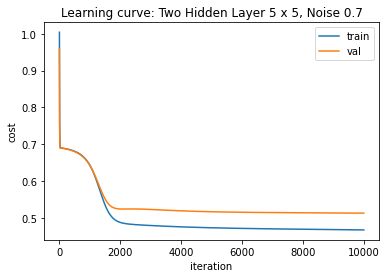

Accuracy: 0.765

Two Hidden Layers : 5 x 7
Iteration: 10001 Cost: 0.511271985453238


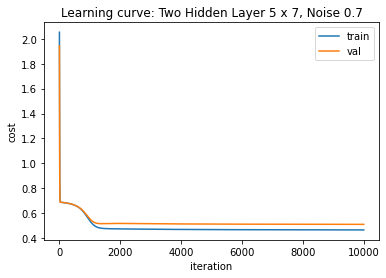

Accuracy: 0.76

Two Hidden Layers : 7 x 3
Iteration: 10001 Cost: 0.5118361056365115


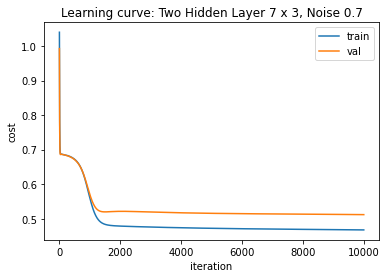

Accuracy: 0.765

Two Hidden Layers : 7 x 5
Iteration: 10001 Cost: 0.5131605144449718


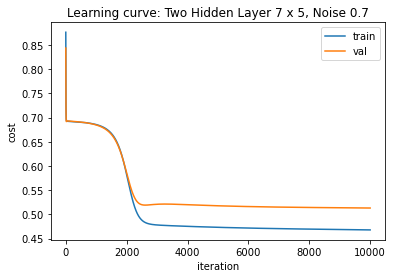

Accuracy: 0.755

Two Hidden Layers : 7 x 7
Iteration: 10001 Cost: 0.5121995798810963


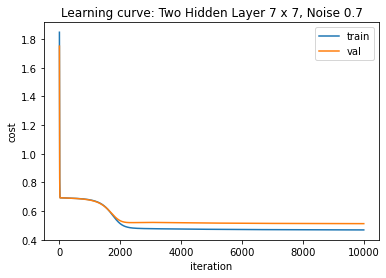

Accuracy: 0.755

####################################################################################################
Noise :  0.9
####################################################################################################
Two Hidden Layers : 3 x 3
Iteration: 57178 Cost: 0.5573273559191876


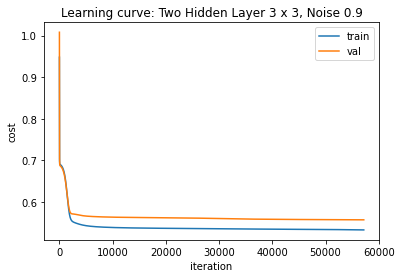

Accuracy: 0.775

Two Hidden Layers : 3 x 5
Iteration: 58182 Cost: 0.5570091426662174


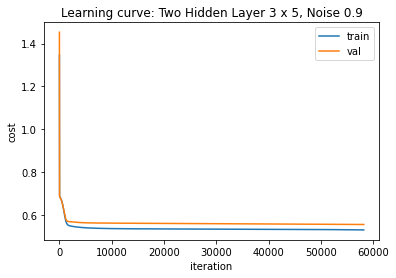

Accuracy: 0.785

Two Hidden Layers : 3 x 7
Iteration: 10001 Cost: 0.5619061047318035


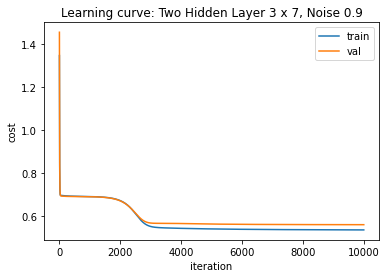

Accuracy: 0.775

Two Hidden Layers : 5 x 3
Iteration: 10001 Cost: 0.5641475051642978


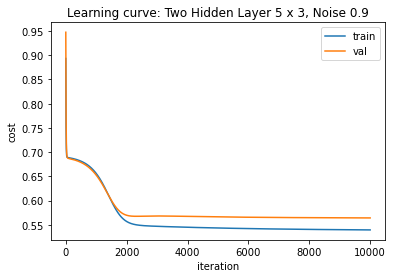

Accuracy: 0.78

Two Hidden Layers : 5 x 5
Iteration: 10001 Cost: 0.5640855881627233


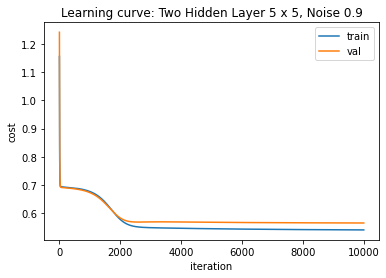

Accuracy: 0.78

Two Hidden Layers : 5 x 7
Iteration: 10001 Cost: 0.5620331598014155


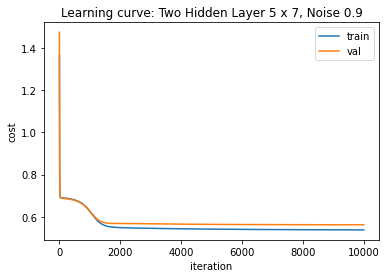

Accuracy: 0.775

Two Hidden Layers : 7 x 3
Iteration: 10001 Cost: 0.5627477493162208


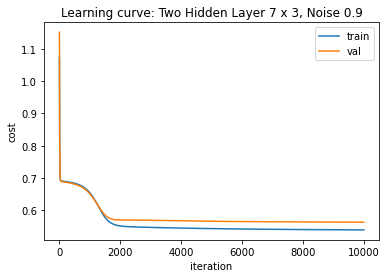

Accuracy: 0.775

Two Hidden Layers : 7 x 5
Iteration: 10001 Cost: 0.5618711235208289


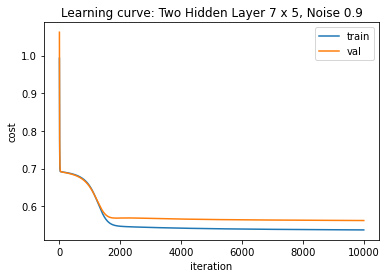

Accuracy: 0.775

Two Hidden Layers : 7 x 7
Iteration: 10001 Cost: 0.5617219160098135


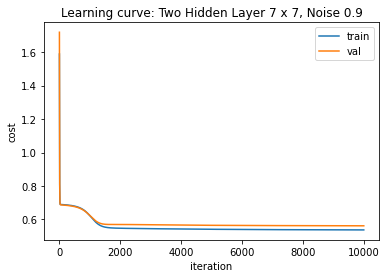

Accuracy: 0.775

####################################################################################################


In [8]:
for i in range(len(noises)):
    train_x, train_y = data[i]["train"]
    val_x, val_y = data[i]["val"]
    test_x, test_y = data[i]["test"]
    
    print("Noise : ", noises[i])
    print("#"*100)
    
    for n1 in range(3,8,2):
        for n2 in range(3,8,2):
            print("Two Hidden Layers : {} x {}".format(n1, n2))
            prob_3 = TwoHiddenLayer(hidden1=n1, hidden2=n2)
            train_cost_history, val_cost_history = prob_3.train(train_x, train_y, val_x, val_y, lr=0.1, iters=100000)
            
            plt.title("Learning curve: Two Hidden Layer {} x {}, Noise {}".format(n1, n2, noises[i]))
            plt.xlabel("iteration")
            plt.ylabel("cost")
            plt.plot(train_cost_history, label='train')
            plt.plot(val_cost_history, label='val')
            plt.legend()
            plt.show()
            print("Accuracy:", prob_3.accuracy(test_x, test_y))
            print("")
    print("#"*100)